In [1]:
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv", encoding="utf-8")
print(df.head())
print(df.shape)


  RevisionColumn NACE2008A21   Units periods  GenderID ValueColumn
0            r_3           0  1000cp  2008Q1         0      3289.9
1            r_3           0  1000cp  2008Q1         1      1749.1
2            r_3           0  1000cp  2008Q1         2      1540.7
3            r_3           0  1000cp  2008Q2         0      3372.1
4            r_3           0  1000cp  2008Q2         1      1794.4
(4260, 6)


In [2]:
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv")

df["ValueColumn"] = pd.to_numeric(df["ValueColumn"], errors="coerce")

print("shape:", df.shape)
print("periods:", df["periods"].unique()[:10])
print(df.head())

shape: (4260, 6)
periods: <StringArray>
['2008Q1', '2008Q2', '2008Q3', '2008Q4', '2009Q1', '2009Q2', '2009Q3',
 '2009Q4', '2010Q1', '2010Q2']
Length: 10, dtype: str
  RevisionColumn NACE2008A21   Units periods  GenderID  ValueColumn
0            r_3           0  1000cp  2008Q1         0       3289.9
1            r_3           0  1000cp  2008Q1         1       1749.1
2            r_3           0  1000cp  2008Q1         2       1540.7
3            r_3           0  1000cp  2008Q2         0       3372.1
4            r_3           0  1000cp  2008Q2         1       1794.4


In [3]:
last_period = df["periods"].max()
print("Последен период:", last_period)

df_last = df[df["periods"] == last_period]

total = (
df_last[df_last["GenderID"] == 0]
.groupby("NACE2008A21")["ValueColumn"]
.sum()
.sort_values(ascending=False)
)

print(total.head(10))

Последен период: 2025Q3
NACE2008A21
0    2956.0
G     516.3
C     470.0
F     225.7
O     224.8
Q     197.4
H     193.5
P     187.2
I     146.5
M     145.1
Name: ValueColumn, dtype: float64


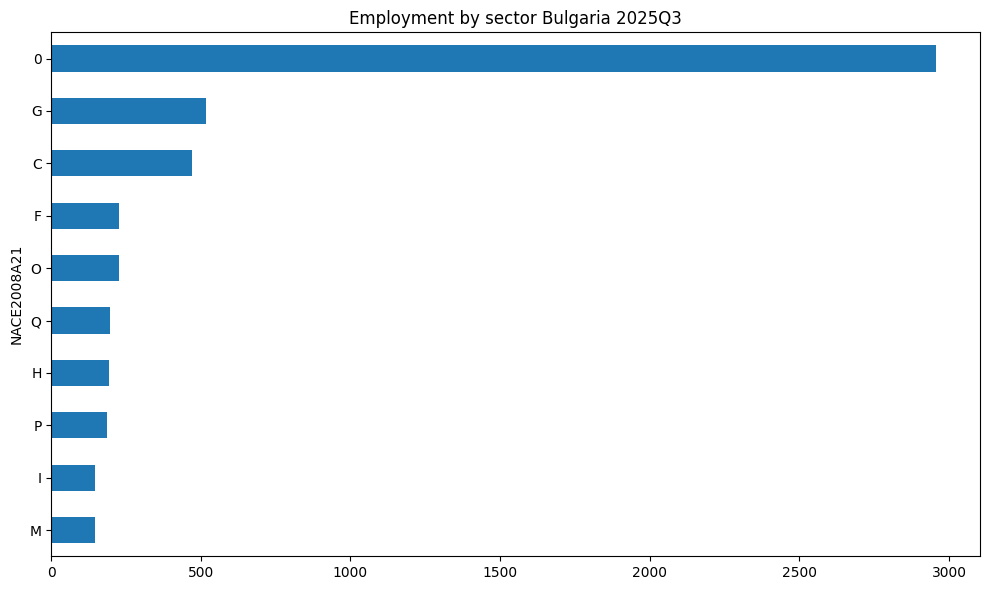

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
total.head(10).sort_values().plot(kind="barh")
plt.title(f"Employment by sector Bulgaria {last_period}")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top_sectors.png")
plt.show()

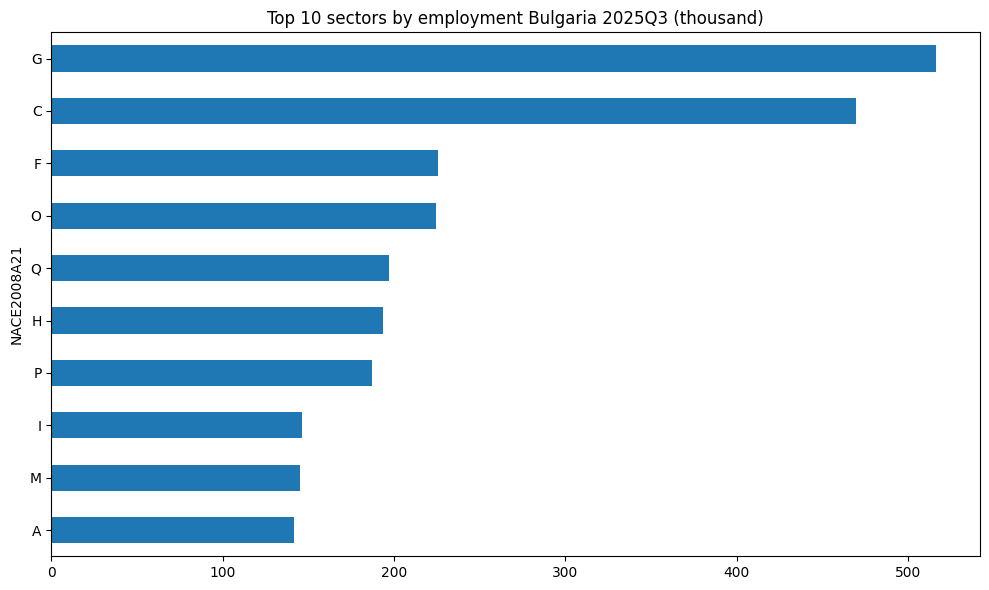

saved: reports/figures/nsi_top10_sectors_no_total.png
NACE2008A21
G    516.3
C    470.0
F    225.7
O    224.8
Q    197.4
H    193.5
P    187.2
I    146.5
M    145.1
A    141.8
Name: ValueColumn, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../data/raw/nsi_employment_by_sector.csv")
df["ValueColumn"] = pd.to_numeric(df["ValueColumn"], errors="coerce")

last_period = df["periods"].max()
df_last = df[(df["periods"] == last_period) & (df["GenderID"] == 0)].copy()

total = (
    df_last.groupby("NACE2008A21")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

total_no_total = total.drop(index="0", errors="ignore")

top10 = total_no_total.head(10)

plt.figure(figsize=(10,6))
top10.sort_values().plot(kind="barh")
plt.title(f"Top 10 sectors by employment Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_top10_sectors_no_total.png")
plt.show()

print("saved: reports/figures/nsi_top10_sectors_no_total.png")
print(top10)


Project Bulgarian Labour Market Analysis
Source National Statistical Institute Bulgaria
Goal Employment trends by sector education region

In [7]:
import pandas as pd

edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv")

print(edu.head())
print(edu.shape)
print(edu.columns)

  RevisionColumn LFS_EDUlevel   Units periods Age10_LFS  ValueColumn
0            r_2            0  1000cp  2003Q1         0       2704.3
1            r_2            0  1000cp  2003Q2         0       2876.0
2            r_2            0  1000cp  2003Q3         0       2933.1
3            r_2            0  1000cp  2003Q4         0       2825.6
4            r_2            0  1000cp  2004Q1         0       2783.8
(1274, 6)
Index(['RevisionColumn', 'LFS_EDUlevel', 'Units', 'periods', 'Age10_LFS',
       'ValueColumn'],
      dtype='str')


last_period: 2025Q3


IndexError: index 0 is out of bounds for axis 0 with size 0

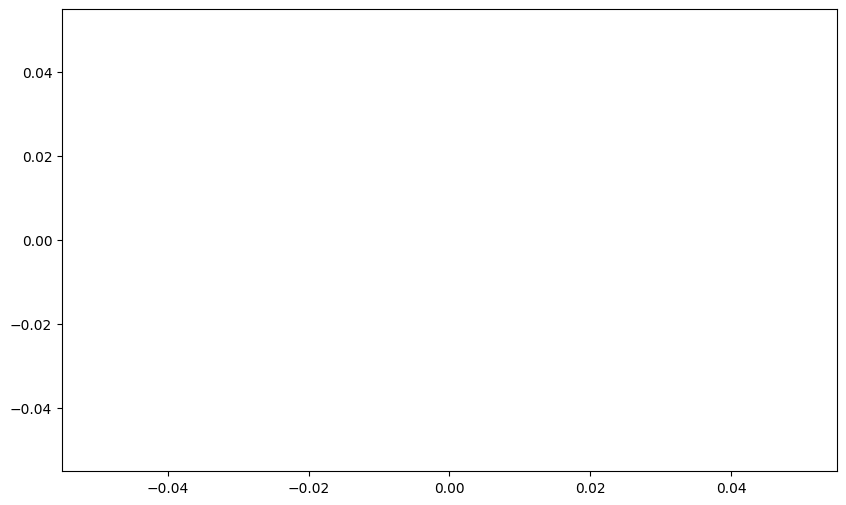

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv")
edu["ValueColumn"] = pd.to_numeric(edu["ValueColumn"], errors="coerce")

last_period = edu["periods"].max()
print("last_period:", last_period)

# Филтър: обща възрастова група (обикновено 0) и последен период
edu_last = edu[(edu["periods"] == last_period) & (edu["Age10_LFS"] == 0)].copy()

top = (
    edu_last.groupby("LFS_EDUlevel")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
top.sort_values().plot(kind="barh")
plt.title(f"Employment by education Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_education_last_period.png")
plt.show()

print(top)


last_period: 2025Q3


IndexError: index 0 is out of bounds for axis 0 with size 0

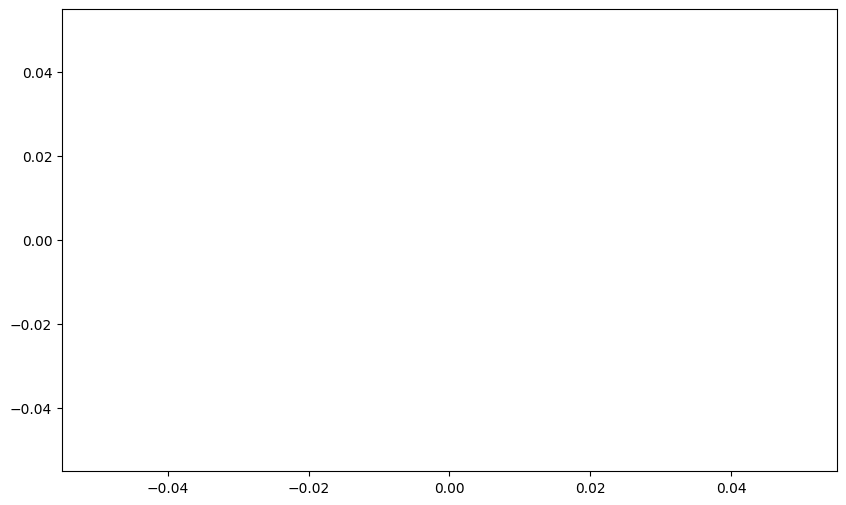

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv")
edu["ValueColumn"] = pd.to_numeric(edu["ValueColumn"], errors="coerce")

last_period = edu["periods"].max()
print("last_period:", last_period)

# Филтър: обща възрастова група (обикновено 0) и последен период
edu_last = edu[(edu["periods"] == last_period) & (edu["Age10_LFS"] == 0)].copy()

top = (
    edu_last.groupby("LFS_EDUlevel")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
top.sort_values().plot(kind="barh")
plt.title(f"Employment by education Bulgaria {last_period} (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_education_last_period.png")
plt.show()

print(top)


In [10]:
print("last period:", edu["periods"].max())
print("unique Age groups:", edu["Age10_LFS"].unique())
print("unique education levels:", edu["LFS_EDUlevel"].unique())


last period: 2025Q3
unique Age groups: <StringArray>
['0', '15 - 64_gr']
Length: 2, dtype: str
unique education levels: <StringArray>
['0', '1', '2', '2_1', '2_2', '3', '4']
Length: 7, dtype: str


In [11]:
edu[edu["periods"] == edu["periods"].max()].head(20)



,RevisionColumn,LFS_EDUlevel,Units,periods,Age10_LFS,ValueColumn
1260,r_49,0,1000cp,2025Q3,0,2956.0
1261,r_49,0,1000cp,2025Q3,15 - 64_gr,2825.6
1262,r_49,1,1000cp,2025Q3,0,1185.2
1263,r_49,1,1000cp,2025Q3,15 - 64_gr,1132.5
1264,r_49,2,1000cp,2025Q3,0,1532.5
1265,r_49,2,1000cp,2025Q3,15 - 64_gr,1466.6
1266,r_49,2_1,1000cp,2025Q3,0,881.9
1267,r_49,2_1,1000cp,2025Q3,15 - 64_gr,839.4
1268,r_49,2_2,1000cp,2025Q3,0,650.5
1269,r_49,2_2,1000cp,2025Q3,15 - 64_gr,627.2


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# зареди файла, ако още не е зареден
edu = pd.read_csv("../data/raw/nsi_employment_by_education.csv", dtype=str)

# оправи типовете
edu["ValueColumn"] = pd.to_numeric(edu["ValueColumn"], errors="coerce")

last_period = edu["periods"].max()

edu_last = edu[
    (edu["periods"] == last_period) &
    (edu["Age10_LFS"].astype(str).str.strip() == "15 - 64_gr")
].copy()

print("rows in edu_last:", len(edu_last))
print(edu_last[["LFS_EDUlevel","Age10_LFS","ValueColumn"]].head())


rows in edu_last: 7
     LFS_EDUlevel   Age10_LFS  ValueColumn
1261            0  15 - 64_gr       2825.6
1263            1  15 - 64_gr       1132.5
1265            2  15 - 64_gr       1466.6
1267          2_1  15 - 64_gr        839.4
1269          2_2  15 - 64_gr        627.2


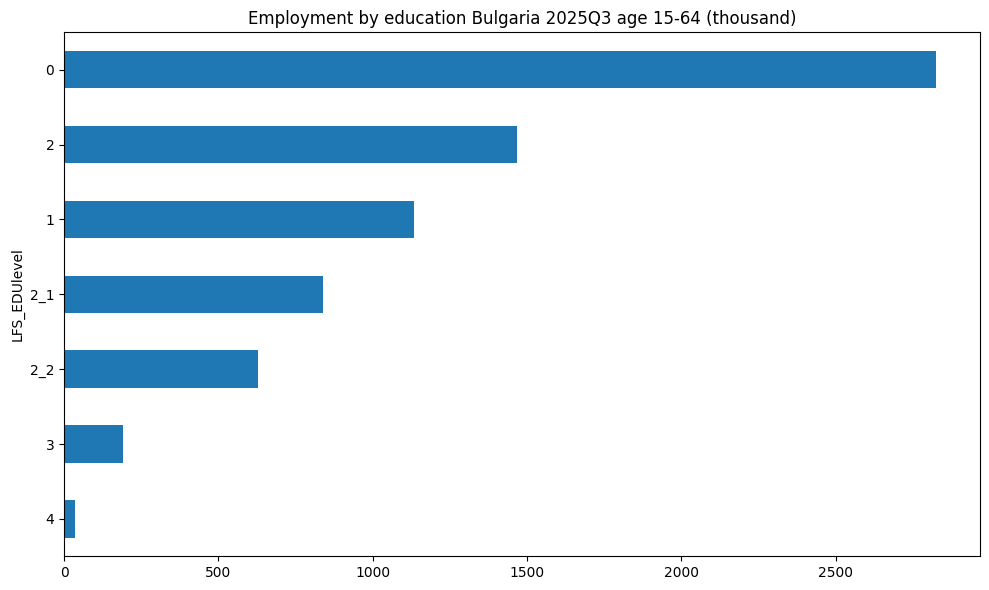

LFS_EDUlevel
0      2825.6
2      1466.6
1      1132.5
2_1     839.4
2_2     627.2
3       190.6
4        35.9
Name: ValueColumn, dtype: float64


In [13]:
top = (
    edu_last.groupby("LFS_EDUlevel")["ValueColumn"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
top.sort_values().plot(kind="barh")
plt.title(f"Employment by education Bulgaria {last_period} age 15-64 (thousand)")
plt.tight_layout()
plt.savefig("../reports/figures/nsi_employment_by_education_15_64.png")
plt.show()

print(top)
